# <center style='color:#730071'>EV Market Segmentation: Indian Automobile Buyer's Behaviour</center>

## <span style='color:#A2D00B'>Importing Libraries</span>

In [18]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from IPython.display import Markdown, display
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

warnings.filterwarnings("ignore")

## <span style='color:#A2D00B'>Exploring Dataset</span>

Source: https://www.kaggle.com/datasets/karivedha/indian-consumers-cars-purchasing-behaviour

The dataset includes the following features:
* Age: The age of the buyer.
* Profession: The occupation of the buyer.
* Marital Status: The marital status of the buyer.
* Education: The highest level of education of the buyer.
* No of Dependents: The number of dependents of the buyer.
* Personal loan: Whether the buyer has a personal loan.
* House Loan: Whether the buyer has a house loan.
* Wife Working: Whether the wife of the buyer is working.
* Salary: The salary of the buyer.
* Wife Salary: The salary of the wife of the buyer.
* Total Salary: The combined salary of the buyer and wife.
* Make: The make of the automobile purchased.
* Price: The price of the automobile purchased.

In [19]:
# loading & displaying data
df = pd.read_csv('Datasets/Indian_automobile_buying_behavour.csv')
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [20]:
# Shape
print("Shape -",df.shape)

Shape - (99, 13)


In [21]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [22]:
# Description
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


## <span style='color:#A2D00B'>Data Cleaning</span>

In [23]:
# Null data
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [24]:
# Duplicate Data
df.duplicated().sum()

0

In [25]:
# Cleaning Wife Working Feature 
print(df['Wife Working'].value_counts())
print("\nHere we can see, that there is unknown 'm' value, so we are converting it into 'Yes'")

# modifying wife working feature
df['Wife Working'] = df['Wife Working'].map({"Yes":"Yes", 'm':"Yes", "No":"No"})

Wife Working
Yes    52
No     46
m       1
Name: count, dtype: int64

Here we can see, that there is unknown 'm' value, so we are converting it into 'Yes'


## <span style='color:#A2D00B'>Exploratory Data Analysis</span>

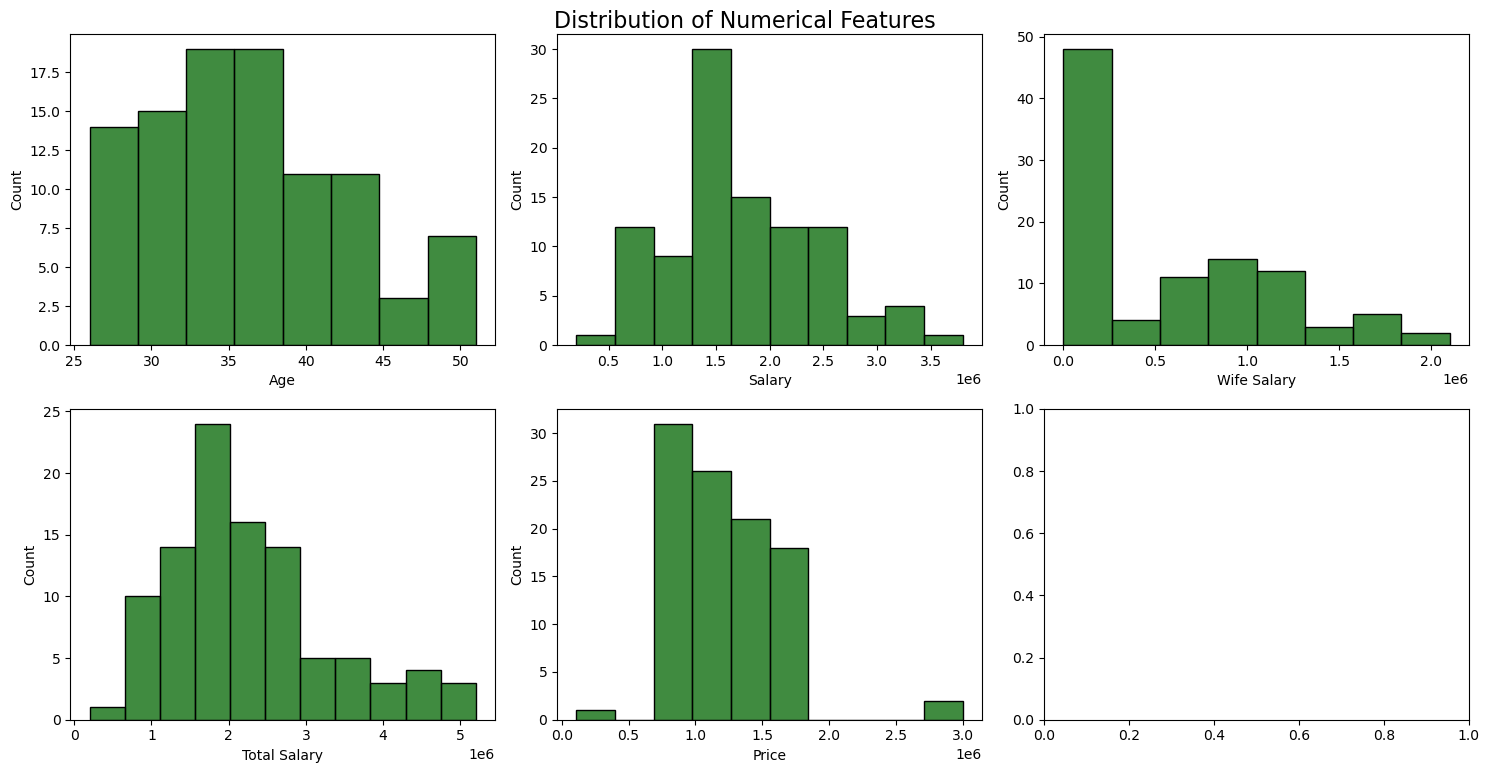

In [26]:
# Analyzing Numerical Features
num_features = ["Age", "Salary", "Wife Salary", "Total Salary", "Price"]

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for i, ax in enumerate(axs.flatten()):
    sns.histplot(data=df, x=num_features[i], ax=ax,  color='DarkGreen')
    if i==4:
        break

plt.suptitle("Distribution of Numerical Features", y=0.96, size='16');
plt.tight_layout()
plt.show()

In [27]:
# percent of customer lies between a particular range
salary_percent = round(len(df.where((df['Salary']>1000000) & (df['Salary']<=2500000)).dropna())/len(df)*100)
age_percent = round(len(df.where((df['Age']>25) & (df['Age']<=45)).dropna())/len(df)*100)
price_percent = round(len(df.where((df['Price']>700000) & (df['Price']<=1600000)).dropna())/len(df)*100)
wife_salary_percent = round(len(df[df['Wife Salary']!=0])/len(df)*100)
total_salary_percent = round(len(df.where((df['Total Salary']>1000000) & (df['Total Salary']<=3000000)).dropna())/len(df)*100) 

# Major Findings
display(Markdown(f"""
`Key Findings`
* Average ***Age*** of car buyer is around 36 and **{age_percent}%** of customer falls between the age of  25 - 45. 
* ***Salaries*** are predominantly found between 1 million and 2.5 million, with **{salary_percent}%** of customers falling within this range.
* **{price_percent}%** of Customer buys, car with ***Price*** range of 7 Lakhs to 16 lakhs.
* A majority of customers have working spouses which is around **{wife_salary_percent}%.**
* The household income for **{total_salary_percent}%** of customers falls between 1 and 3 million.
"""))


`Key Findings`
* Average ***Age*** of car buyer is around 36 and **92%** of customer falls between the age of  25 - 45. 
* ***Salaries*** are predominantly found between 1 million and 2.5 million, with **72%** of customers falling within this range.
* **79%** of Customer buys, car with ***Price*** range of 7 Lakhs to 16 lakhs.
* A majority of customers have working spouses which is around **52%.**
* The household income for **73%** of customers falls between 1 and 3 million.


Text(0.5, 0.95, 'Distribution of Categorical Features')

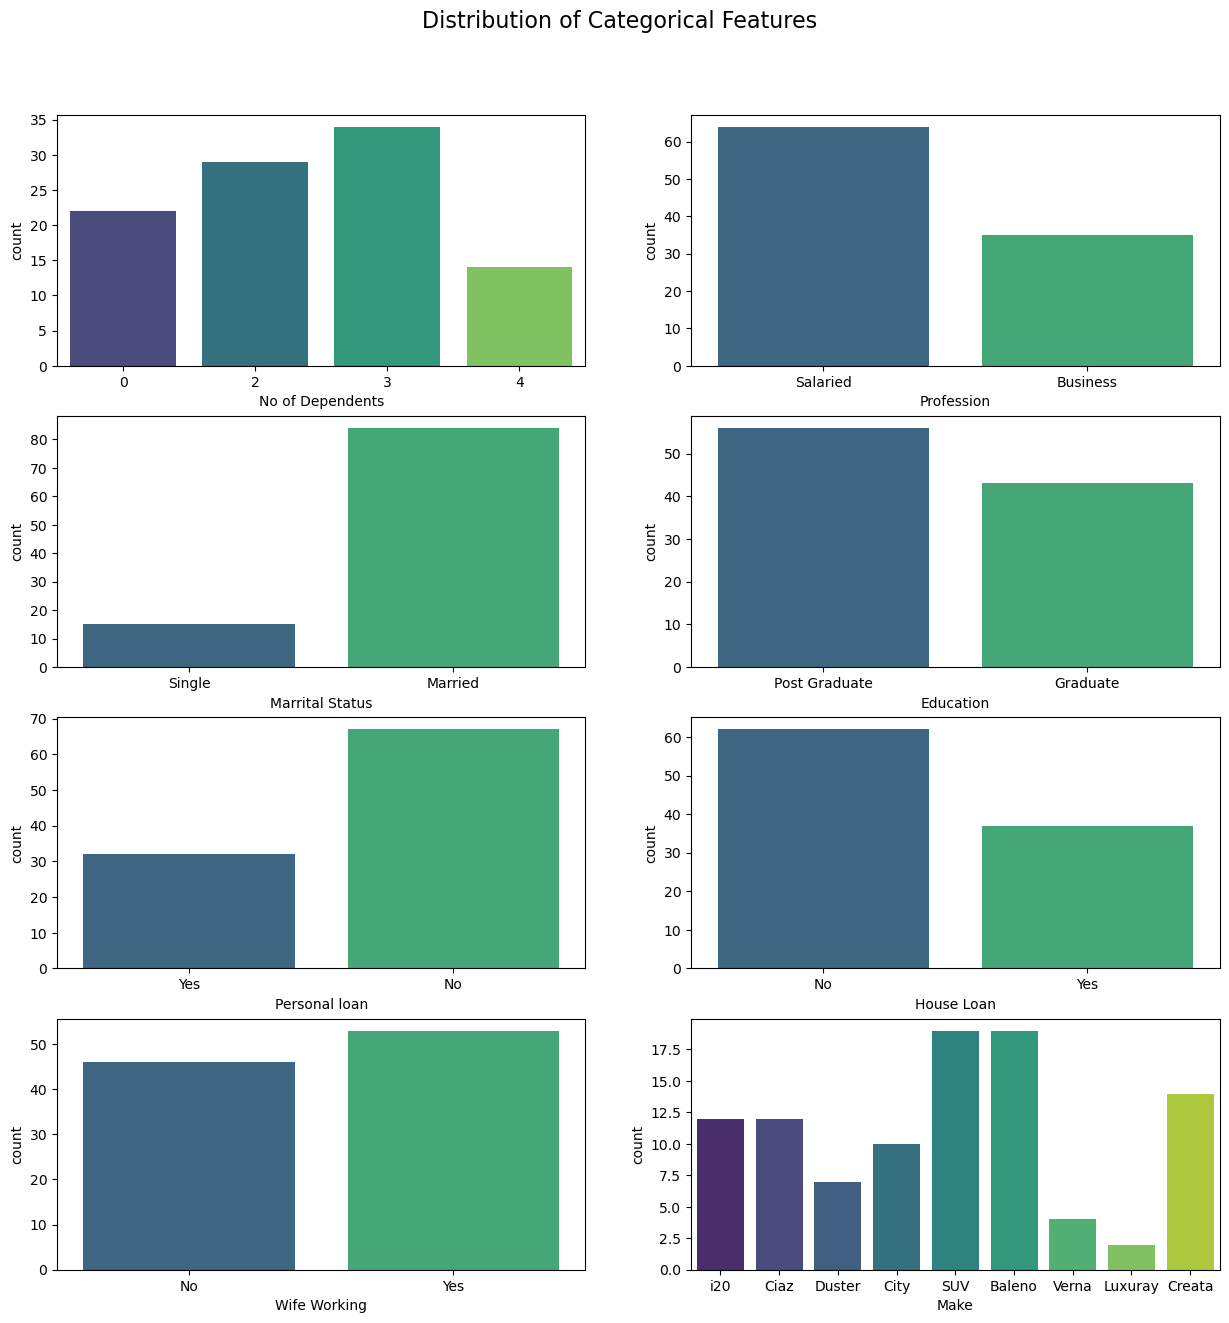

In [28]:
# Analyzing Categorical Features
cat_features = ['No of Dependents', 'Profession', 'Marrital Status', 'Education', 
                'Personal loan', 'House Loan', 'Wife Working', 'Make']

fig, axs = plt.subplots(4, 2, figsize=(15, 15))
for i, ax in enumerate(axs.flatten()):
    sns.countplot(data=df, x=cat_features[i], ax=ax, palette='viridis')
plt.suptitle("Distribution of Categorical Features", y=0.95, size='16')

`Key Findings`
* Most of the customers have 2 to 3 dependents
* Approximately 65% of the customer base is employed in salaried positions, while 35% are self-employed.
* Approximately 15% of the customers are single, while the remaining 85% are married.
* Approximately 55% customers hold a Post Graduate degree while 35% have a Graduate degree.
* Approximately 68% of the customers do not have a personal loan.
* Approximately 62% of the customers do not have a house loan.
* A majority of customers have working spouses which is around 52%.
* The most popular vehicle purchases among customers are SUVs and Balenos followed by Cretas.

## <span style='color:#A2D00B'>Observations</span>

### <span style="color:green">Customer Demographics:</span>
| **Field**             | **Description**                                  |
|-----------------------|--------------------------------------------------|
| ***Average Age***       | 36 years old                                     |
| ***Age Distribution***  | 92% of customers are between 25 and 45 years old |
| ***Marital Status***    | 85% married, 15% single                          |
| ***Dependents***        | Most customers have 2 or 3 dependents            |
| ***Employment***        | 65% salaried, 35% self-employed                  |
| ***Education***         | 55% hold a postgraduate degree, 35% hold a graduate degree |


### <span style="color:green">Financial Information:</span>
| **Field**             | **Description**                                                      |
|-----------------------|----------------------------------------------------------------------|
| ***Salary Range***      | 72% of customers earn between ₹1 - ₹2.5 million annually   |
| ***Household Income***  | 73% of customers have income between ₹1 - ₹3 million |
| ***Personal Loans***    | 68% of customers do not have a personal loan                         |
| ***House Loans***       | 62% of customers do not have a house loan                            |
| ***Working Spouses***   | 52% of customers have working spouses                                |


### <span style="color:green">Vehicle Purchases:</span>
| **Field**             | **Description**                                                      |
|-----------------------|----------------------------------------------------------------------|
| ***Popular Models***    | SUVs, Baleno, Creta are the most popular vehicle choices             |
| ***Price Range***       | 79% of customers purchase vehicles within range of ₹7 - ₹16 lakh |
| ***Luxury Vehicles***   | Very few customers purchase luxury vehicles  |

## <span style='color:#A2D00B'>Data Preprocessing</span>

In [29]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column in the DataFrame
df_encoded = df.copy()  # Make a copy of the original DataFrame to preserve it
for column in df_encoded.select_dtypes(include=['object', 'category']).columns:
    df_encoded[column] = encoder.fit_transform(df_encoded[column])

# Now df_encoded contains the encoded values
df_encoded.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,8,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6,1600000


In [30]:
# feature scaling
df_scaled = df_encoded.copy()
scaler = StandardScaler()
scaling_feature = ["Age", "Salary", "Wife Salary", "Total Salary", "Price"]
df_scaled[scaling_feature]  = scaler.fit_transform(df_scaled[scaling_feature])

## <span style='color:#A2D00B'>Market Segmentation</span>

### <span style='color:#A2D00B'>K Means Clustering</span>

In [31]:
wcss = []
ss = []

# Perform PCA
pca = PCA(2)
pca_encoded = pca.fit_transform(df_scaled)

for i in range(2,12):
    kmean = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmean.fit(df_scaled)
    wcss.append(kmean.inertia_)
    
    y = kmean.predict(df_scaled)
    s = silhouette_score(pca_encoded, y, random_state=0)
    ss.append(round(s, 5))

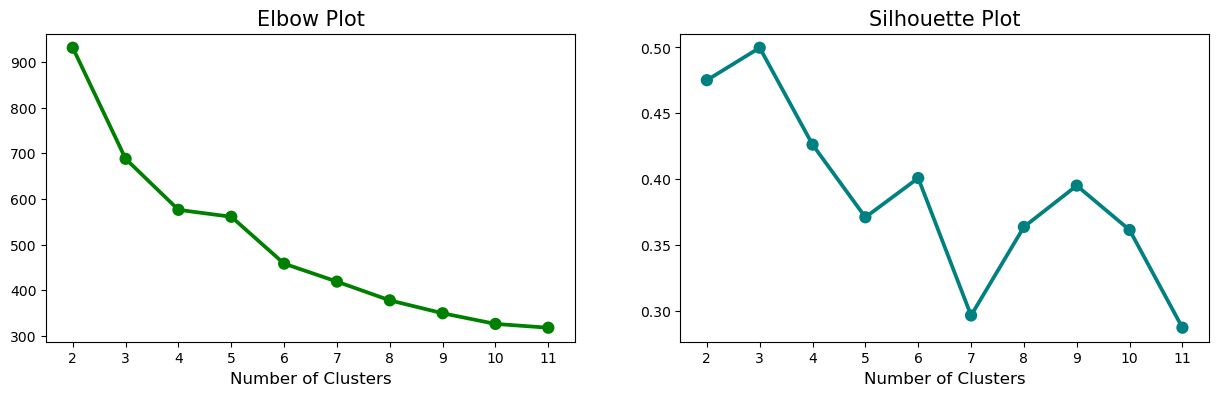

In [32]:
# Identifying Optimal Value of K for KMeans Clustering
fig, axs = plt.subplots(1,2, figsize=(15, 4))
sns.pointplot(x=list(range(2, 12)), y=wcss, color='Green', ax = axs[0])
axs[0].set_title("Elbow Plot", size=15)
axs[0].set_xlabel("Number of Clusters", size=12)

sns.pointplot(x=list(range(2, 12)), y=ss, ax=axs[1], color='Teal')
axs[1].set_title("Silhouette Plot", size=15)
axs[1].set_xlabel("Number of Clusters", size=12)
plt.show()

`Note` - **Both the elbow and silhouette methods indicate that three clusters are optimal for the K-means algorithm.**

### <span style='color:#A2D00B'>Plotting Clusters Using PCA</span>

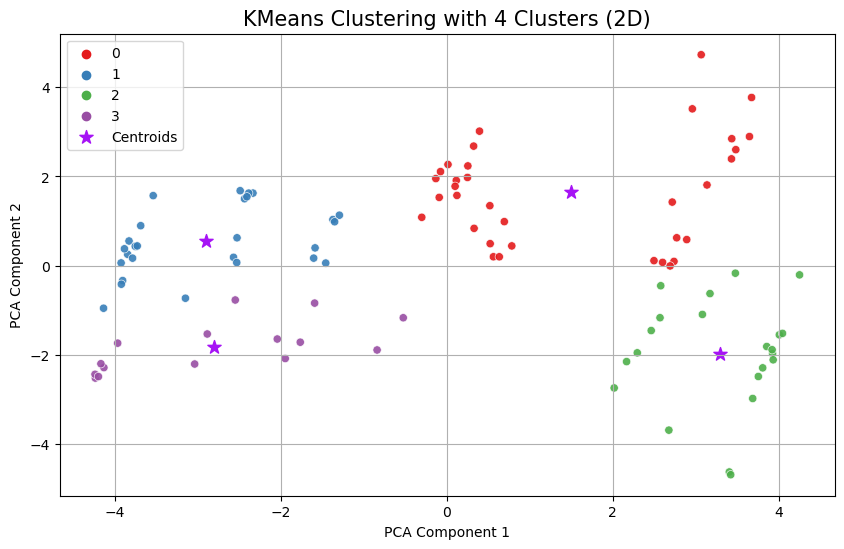

In [33]:
# Apply KMeans with 4 clusters
Clustering = KMeans(n_clusters=4, random_state=2).fit(df_scaled)
labels = Clustering.labels_
df['Cluster'] = labels
df_encoded['Cluster'] = labels

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_scaled)

# Transform the cluster centers using the same PCA transformation
centers = pca.transform(Clustering.cluster_centers_)

# 2D Scatter Plot using Seaborn
# 2D Scatter Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=pca_df[:, 0],
    y=pca_df[:, 1],
    hue=labels,
    palette="Set1",
    legend='full',
    alpha=0.9
)
plt.scatter(centers[:, 0], centers[:, 1], c='#A613F5', s=100, marker='*', label='Centroids')
plt.title("KMeans Clustering with 4 Clusters (2D)", size=15)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

# 3D Scatter Plot using Plotly
# Perform PCA for 3 components for 3D plotting
pca_3d = PCA(n_components=3)
pca_df_3d = pca_3d.fit_transform(df_scaled)
centers_3d = pca_3d.transform(Clustering.cluster_centers_)

fig = px.scatter_3d(
    x=pca_df_3d[:, 0],
    y=pca_df_3d[:, 1],
    z=pca_df_3d[:, 2],
    color=labels,
    title="KMeans Clustering with 4 Clusters (3D)",
    labels={'x': 'PCA Component 1', 'y': 'PCA Component 2', 'z': 'PCA Component 3'}
)

# Add cluster centroids to the 3D plot
fig.add_scatter3d(
    x=centers_3d[:, 0],
    y=centers_3d[:, 1],
    z=centers_3d[:, 2],
    mode='markers',
    marker=dict(size=5, color='red', symbol='x'),
    name='Centroids'
)

fig.show()


`Note:` **Clear visualization of the 4 identified clusters and their corresponding centroids is provided through PCA plotting.**

### <span style='color:#A2D00B'>Profiling Segments</span>

In [34]:
data_pivot = df_encoded.groupby('Cluster').mean().T
data_pivot_mean = data_pivot.mean(axis=1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

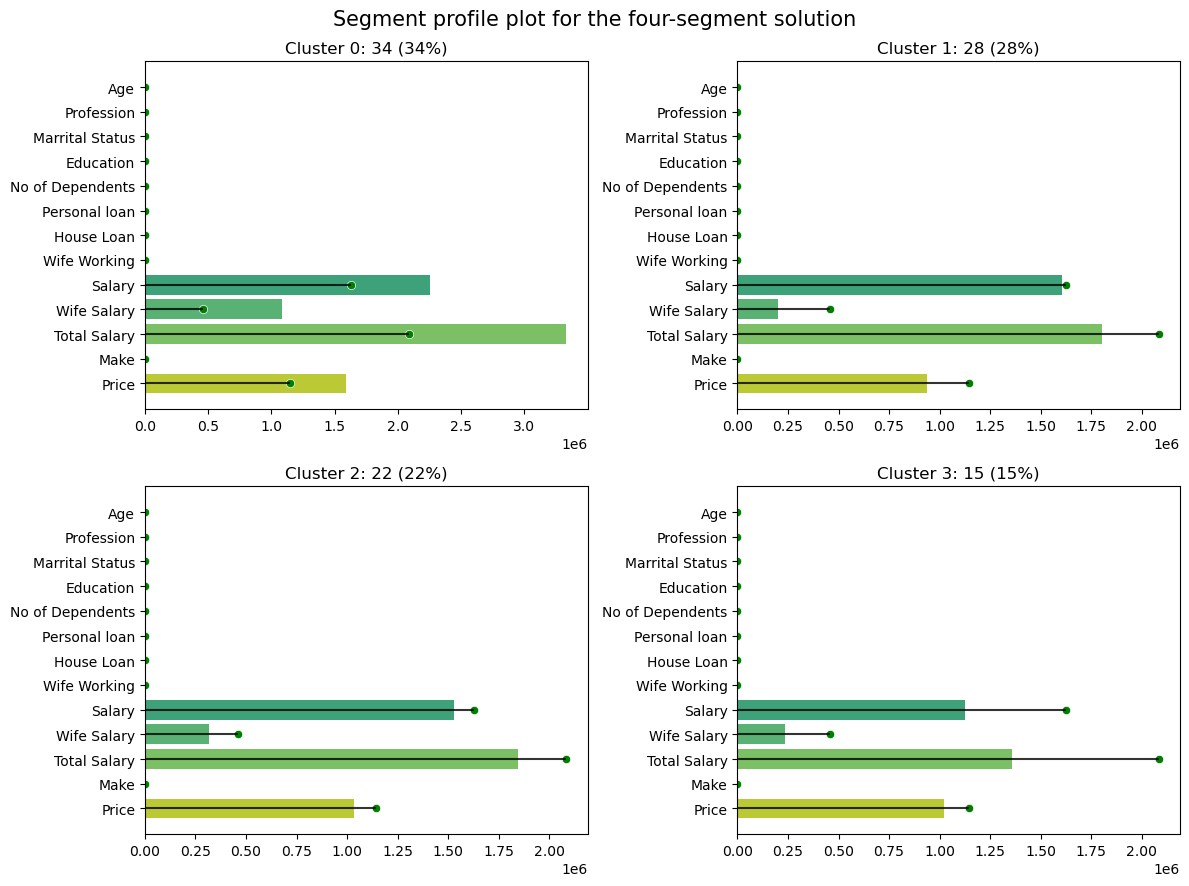

In [35]:
# Segment profile plot for the four-segment
plt.figure(figsize = (12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index, palette='viridis')
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'green')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='black', alpha = 0.8)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {df_encoded['Cluster'].value_counts()[i]} ({df_encoded['Cluster'].value_counts()[i]*100/len(df_encoded):.0f}%)")

plt.suptitle("Segment profile plot for the four-segment solution", fontsize = 15)
plt.tight_layout()
plt.show()

This section presents a comprehensive analysis of the consumer segments based on their mean characteristics, as detailed in the provided data. The following insights capture the unique profiles of each segment:

- **Segment 0** (34% of consumers) is characterized by its higher average values in salary, total salary, and make, indicating a more affluent group. They show a strong emphasis on having a wife working and higher personal and house loans. This segment values education and has relatively fewer dependents compared to others, suggesting a more financially stable and educated demographic.

- **Segment 1** (28% of consumers) features a moderate average salary and total salary, with a notable increase in personal and house loans. This group has a higher number of dependents and shows less emphasis on education compared to Segment 0. Their lower "Make" value suggests less focus on vehicle brand or prestige.

- **Segment 2** (22% of consumers) stands out with higher values in salary, total salary, and make, similar to Segment 0 but with a notable difference in marital status. This group has fewer dependents and a moderate level of personal and house loans. They also show a higher appreciation for the vehicle's make and price, indicating a preference for value and prestige.

- **Segment 3** (15% of consumers) has the lowest average salary and total salary, with minimal house loans and personal loans. They also exhibit fewer dependents and a moderate level of wife working status. This segment is characterized by its relatively high value placed on marital status and personal loan, indicating a different set of priorities compared to other segments.

In summary, each segment reflects distinct financial profiles and priorities, with varying emphasis on salary, dependents, loans, and vehicle make. This segmentation helps in tailoring marketing strategies to address the specific needs and preferences of each group.


# 

In [36]:
# Separate numerical and categorical columns
numerical_columns = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']
categorical_columns = ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working', 'Make']

# Profiling numerical features
numerical_profile = df.groupby('Cluster')[numerical_columns].median()
numerical_profile['Size'] = df['Cluster'].value_counts()

# Profiling categorical features
categorical_profile = pd.DataFrame()
for col in categorical_columns:
    mode_series = df.groupby('Cluster')[col].agg(lambda x: x.mode()[0])
    categorical_profile[col] = mode_series

# Combine numerical and categorical profiles
segment_profile = pd.concat([numerical_profile, categorical_profile], axis=1)
segment_profile

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price,Size,Profession,Marrital Status,Education,Personal loan,House Loan,Wife Working,Make
Cluster,,,,,,,,,,,,,,
0,41.0,3.0,2200000.0,1200000.0,3100000.0,1500000.0,34,Salaried,Married,Post Graduate,No,No,Yes,SUV
1,36.5,3.0,1500000.0,0.0,1900000.0,1050000.0,28,Salaried,Married,Graduate,No,Yes,No,Baleno
2,34.0,2.0,1500000.0,0.0,1800000.0,800000.0,22,Salaried,Married,Post Graduate,No,No,No,i20
3,29.0,0.0,1100000.0,0.0,1300000.0,1100000.0,15,Salaried,Single,Post Graduate,No,No,No,Baleno


<center><h2>Describing Segements<h2></center>

<div style="display: flex; justify-content: space-around; flex-wrap: wrap;">

<div style="width: 40%; margin: 12px; padding: 5px; border: 1px solid #ddd; border-radius: 5px;">
    <h4 style="color:darkred;">Cluster 0: High-Income Families</h4>
    <ul style="color:darkred;">
        <li><strong>Average Age:</strong> 41 years</li>
        <li><strong>Number of Dependents:</strong> 3</li>
        <li><strong>Average Salary:</strong> ₹2,200,000</li>
        <li><strong>Average Wife's Salary:</strong> ₹1,200,000</li>
        <li><strong>Total Household Salary:</strong> ₹3,100,000</li>
        <li><strong>Average Price of Car Purchased:</strong> ₹1,500,000</li>
        <li><strong>Segment Size:</strong> 34 customers</li>
        <li><strong>Most Common Profession:</strong> Salaried</li>
        <li><strong>Most Common Marital Status:</strong> Married</li>
        <li><strong>Most Common Education Level:</strong> Post Graduate</li>
        <li><strong>Personal Loan Status:</strong> No</li>
        <li><strong>House Loan Status:</strong> No</li>
        <li><strong>Wife Working Status:</strong> Yes</li>
        <li><strong>Most Common Car Make:</strong> SUV</li>
    </ul>
</div>

<div style="width: 40%; margin: 12px; padding: 5px; border: 1px solid #ddd; border-radius: 5px;">
    <h4 style="color:#40B7EB;">Cluster 1: Family-Oriented Middle-Income</h4>
    <ul style="color:#40B7EB;">
        <li><strong>Average Age:</strong> 36.5 years</li>
        <li><strong>Number of Dependents:</strong> 3</li>
        <li><strong>Average Salary:</strong> ₹1,500,000</li>
        <li><strong>Average Wife's Salary:</strong> ₹0</li>
        <li><strong>Total Household Salary:</strong> ₹1,900,000</li>
        <li><strong>Average Price of Car Purchased:</strong> ₹1,050,000</li>
        <li><strong>Segment Size:</strong> 28 customers</li>
        <li><strong>Most Common Profession:</strong> Salaried</li>
        <li><strong>Most Common Marital Status:</strong> Married</li>
        <li><strong>Most Common Education Level:</strong> Graduate</li>
        <li><strong>Personal Loan Status:</strong> No</li>
        <li><strong>House Loan Status:</strong> Yes</li>
        <li><strong>Wife Working Status:</strong> No</li>
        <li><strong>Most Common Car Make:</strong> Baleno</li>
    </ul>
</div>

<div style="width: 40%; margin: 12px; padding: 5px; border: 1px solid #ddd; border-radius: 5px;">
    <h4 style="color:green;">Cluster 2: Affluent Young Professionals</h4>
    <ul style="color:green;">
        <li><strong>Average Age:</strong> 34 years</li>
        <li><strong>Number of Dependents:</strong> 2</li>
        <li><strong>Average Salary:</strong> ₹1,500,000</li>
        <li><strong>Average Wife's Salary:</strong> ₹0</li>
        <li><strong>Total Household Salary:</strong> ₹1,800,000</li>
        <li><strong>Average Price of Car Purchased:</strong> ₹800,000</li>
        <li><strong>Segment Size:</strong> 22 customers</li>
        <li><strong>Most Common Profession:</strong> Salaried</li>
        <li><strong>Most Common Marital Status:</strong> Married</li>
        <li><strong>Most Common Education Level:</strong> Post Graduate</li>
        <li><strong>Personal Loan Status:</strong> No</li>
        <li><strong>House Loan Status:</strong> No</li>
        <li><strong>Wife Working Status:</strong> No</li>
        <li><strong>Most Common Car Make:</strong> i20</li>
    </ul>
</div>

<div style="width: 40%; margin: 12px; padding: 5px; border: 1px solid #ddd; border-radius: 5px;">
    <h4 style="color:purple;">Cluster 3: Emerging Young Professionals</h4>
    <ul style="color:purple;">
        <li><strong>Average Age:</strong> 29 years</li>
        <li><strong>Number of Dependents:</strong> 0</li>
        <li><strong>Average Salary:</strong> ₹1,100,000</li>
        <li><strong>Average Wife's Salary:</strong> ₹0</li>
        <li><strong>Total Household Salary:</strong> ₹1,300,000</li>
        <li><strong>Average Price of Car Purchased:</strong> ₹1,100,000</li>
        <li><strong>Segment Size:</strong> 15 customers</li>
        <li><strong>Most Common Profession:</strong> Salaried</li>
        <li><strong>Most Common Marital Status:</strong> Single</li>
        <li><strong>Most Common Education Level:</strong> Post Graduate</li>
        <li><strong>Personal Loan Status:</strong> No</li>
        <li><strong>House Loan Status:</strong> No</li>
        <li><strong>Wife Working Status:</strong> No</li>
        <li><strong>Most Common Car Make:</strong> Baleno</li>
    </ul>
</div>

</div>


## <span style='color:#A2D00B'>Conclusion</span>

The market segmentation analysis uncovers distinct customer profiles within the automotive market, each with unique characteristics and preferences:

### <span style='color:darkred'>Cluster 0: High-Income Families</span>

This segment consists of affluent families, typically married with an average of three dependents. The average household income is substantial, at ₹3,100,000, with significant contributions from both spouses. Customers in this segment are generally older, averaging 41 years, and possess postgraduate education. They prefer high-end vehicles such as SUVs, with an average price of ₹1,500,000. This segment typically does not carry personal or house loans and often has working spouses.

### <span style='color:#40B7EB'>Cluster 1: Family-Oriented Middle-Income</span>

Characterized by middle-income families, this segment features married individuals with an average of three dependents. The average total household income is ₹1,900,000, primarily supported by one income earner. Customers are typically 36.5 years old, hold a graduate degree, and prefer practical vehicles like the Baleno, priced around ₹1,050,000. Most customers in this segment have house loans but no personal loans, and their spouses are generally not working.

### <span style='color:green'>Cluster 2: Affluent Young Professionals</span>

This segment is comprised of younger professionals, usually married with an average of two dependents. The average household income is ₹1,800,000, with no significant contribution from a spouse's income. Customers in this segment are typically 34 years old and have postgraduate education. They prefer affordable vehicles like the i20, with an average price of ₹800,000. This segment generally does not have personal or house loans, and their spouses are generally not working.

### <span style='color:purple'>Cluster 3: Emerging Young Professionals</span>

This segment includes young, single professionals with no dependents. They are relatively young, averaging 29 years old, and often hold postgraduate degrees. Their total household income is around ₹1,300,000, with no contribution from a spouse's income. Customers prefer vehicles like the Baleno, with an average price of ₹1,100,000. This segment typically does not carry personal or house loans, and their spouses are not working.

By understanding these segments, we can tailor marketing strategies and product offerings to meet the specific needs and preferences of each group, enhancing customer satisfaction and driving targeted sales.
